<a href="https://colab.research.google.com/github/Rad-Monk/Code/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
np.set_printoptions(precision = 3, suppress = True)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2:'Europe', 3: 'japan'})

this part here cahnges the numerical values of origin to their corresponding values in countries

In [ ]:
dataset.tail()

In [ ]:
dataset = pd.get_dummies(dataset, columns = ['Origin'], prefix ='', prefix_sep = '')
dataset.tail()

- pd.get_dummies : this converts categorical variables into one hot encoded values, it creates a new dataframe with values encoded, basically pd.getdummies just takes all the unique values of a row and make seperate columns for them, then fill those with 1 or 0 if they exist or not

In [ ]:
train_dataset = dataset.sample(frac = .8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

train_dataset.index = this just drops all the rows which already exist in attached dataaset, in our case train_dataset, so every row which exist in the train_dataset won't be inside test_dataset.

In [ ]:
train_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,USA,japan
146,28.0,4,90.0,75.0,2125.0,14.5,74,False,True,False
282,22.3,4,140.0,88.0,2890.0,17.3,79,False,True,False
69,12.0,8,350.0,160.0,4456.0,13.5,72,False,True,False
378,38.0,4,105.0,63.0,2125.0,14.7,82,False,True,False
331,33.8,4,97.0,67.0,2145.0,18.0,80,False,False,True
...,...,...,...,...,...,...,...,...,...,...
281,19.8,6,200.0,85.0,2990.0,18.2,79,False,True,False
229,16.0,8,400.0,180.0,4220.0,11.1,77,False,True,False
150,26.0,4,108.0,93.0,2391.0,15.5,74,False,False,True
145,32.0,4,83.0,61.0,2003.0,19.0,74,False,False,True


In [ ]:
test_dataset

In [ ]:
sns.pairplot(train_dataset[['MPG','Cylinders','Displacement','Weight']], diag_kind = 'kde')

the names of columns provided in the pairplot parameters are used to form the plots, the plots are formed between each pair of the columns

In [ ]:
train_dataset.describe().transpose()

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

here, we are both removing the target column from train_columns and also adding that target column into train_labels.

In [ ]:
train_dataset

In [ ]:
train_features

In [ ]:
print(np.array(train_features))

In [ ]:
train_features.shape

In [ ]:
my_normalizer = tf.keras.layers.Normalization(axis=-1, name="my_normalizer")

you can rename normalizers if each serve a different functions, i did this to overwrite the previous one.

In [ ]:
train_features.dtypes

In [ ]:
train_features = train_features.astype(np.float64)

here we converted all the train_features to same datatype, so that it does not have problem during normalization, it was already having a problem with implicit conversion of datatype

In [ ]:
train_features.dtypes

Cylinders       float64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year      float64
Europe          float64
USA             float64
japan           float64
dtype: object

In [ ]:
train_features_array = train_features.to_numpy()

In [ ]:
my_normalizer.adapt(train_features_array)

In [ ]:
print(my_normalizer.mean.numpy)

In [ ]:
first = np.array(train_features[:1])
with np.printoptions(precision = 2, suppress = True):
  print(first)
  print()
  print(my_normalizer(first ).numpy())

this is automatically returning normalized outputs on new data based on the data it adapted on.

In [ ]:
horsepower_array = np.array(train_features['Horsepower'])
horsepower_normalizer = layers.Normalization(input_shape = [1,], axis = None)
horsepower_normalizer.adapt(horsepower_array)

next we first try making a linear regression model using only one feature as input, horsepower

In [ ]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units = 1)
])
horsepower_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


creating a sequential layer

In [ ]:
horsepower_model.predict(horsepower_array[:10])

1/1 [==============================] - 0s 221ms/step


array([[ 0.845],
       [ 0.477],
       [-1.559],
       [ 1.184],
       [ 1.071],
       [ 0.421],
       [ 1.269],
       [ 1.071],
       [ 0.279],
       [ 0.477]], dtype=float32)

In [ ]:
horsepower_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .1),
    loss= 'mean_absolute_error'
)

In [ ]:
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs = 100,
    verbose = 0,
    validation_split = .2
)

In [ ]:
horsepower_model.predict(horsepower_array[:10])

1/1 [==============================] - 0s 89ms/step


array([[27.632],
       [25.432],
       [13.247],
       [29.663],
       [28.986],
       [25.093],
       [30.171],
       [28.986],
       [24.247],
       [25.432]], dtype=float32)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epochs'] = history.epoch
hist.tail()

,loss,val_loss,epochs
95,3.807305,4.215160,95
96,3.806914,4.173513,96
97,3.804190,4.173564,97
98,3.803558,4.191516,98
99,3.805893,4.203403,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label = 'loss'),
  plt.plot(history.history['val_loss'], label = 'val_loss'),
  plt.ylim([0, 10]),
  plt.xlabel('epoch'),
  plt.ylabel('Error[MPG]'),
  plt.legend(),
  plt.grid(True)

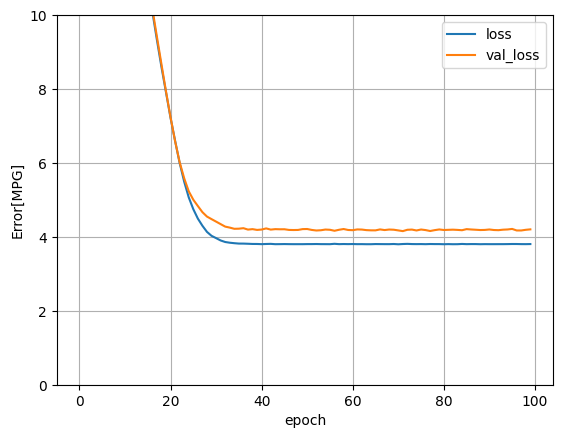

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}
test_results['horsepower_model'] = horsepower_model.evaluate(test_features['Horsepower'], test_labels, verbose = 0)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 2ms/step


In [ ]:
def plot_horsepower(x,y):
  plt.scatter(train_features['Horsepower'],train_labels, label = 'data'),
  plt.plot(x,y, color = 'k', label = 'predictions'),
  plt.xlabel('Horsepower'),
  plt.ylabel('MPG'),
  plt.legend()

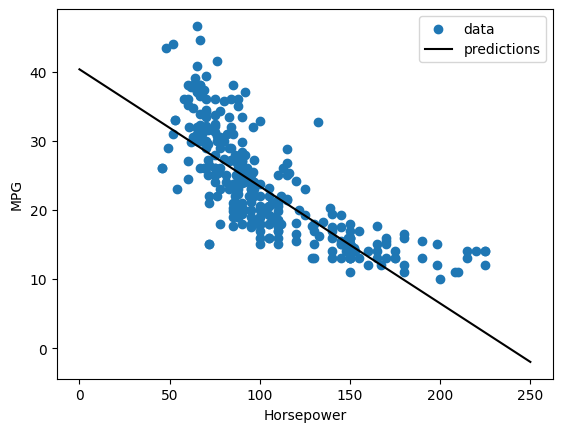

In [ ]:
plot_horsepower(x,y)

In [ ]:
linear_model = tf.keras.Sequential([
    my_normalizer,
    layers.Dense(units= 1)
])

In [ ]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 41ms/step


array([[ 0.793],
       [ 0.61 ],
       [-1.966],
       [ 2.371],
       [ 0.5  ],
       [-0.217],
       [ 0.409],
       [ 0.997],
       [-0.733],
       [-1.364]], dtype=float32)

In [ ]:
linear_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .1),
    loss = 'mean_absolute_error'
)

In [ ]:
history = linear_model.fit(
    train_features,
    train_labels,
    epochs = 100,
    verbose = 0,
    validation_split = .2
)

In [ ]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 47ms/step


array([[26.328],
       [24.844],
       [12.14 ],
       [31.453],
       [32.158],
       [22.487],
       [32.855],
       [24.296],
       [20.601],
       [26.35 ]], dtype=float32)

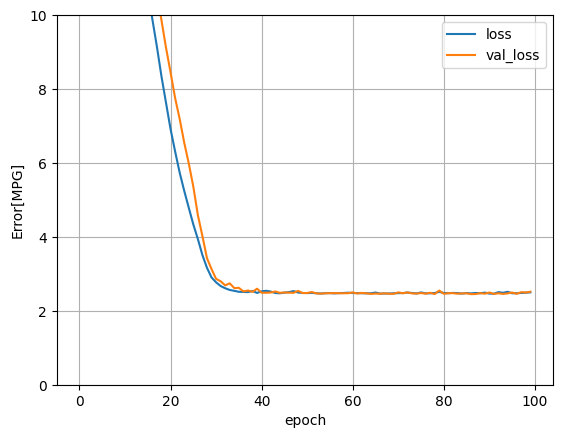

In [ ]:
plot_loss(history)

In [ ]:
test_features = test_features.astype(np.float64)
test_features = test_features.to_numpy()

In [ ]:
test_results['linear_model'] = linear_model.evaluate(test_features, test_labels, verbose = 0)

In [ ]:
def build_and_compile(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(units = 64, activation = 'relu'),
      layers.Dense(units = 64, activation = 'relu'),
      layers.Dense(1)
  ])

  model.compile(
      optimizer = tf.keras.optimizers.Adam(learning_rate = .001),
      loss = 'mean_absolute_error'
  )

  return model

In [ ]:
dnn_horsepower_model = build_and_compile(horsepower_normalizer)

In [ ]:
dnn_horsepower_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_7 (Dense)             (None, 64)                128       
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4356 (17.02 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [ ]:
dnn_horsepower_model.predict(horsepower_array[:10])

1/1 [==============================] - 0s 53ms/step


array([[ 0.051],
       [ 0.029],
       [-0.316],
       [ 0.071],
       [ 0.064],
       [ 0.025],
       [ 0.076],
       [ 0.064],
       [ 0.017],
       [ 0.029]], dtype=float32)

In [ ]:
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs = 100,
    verbose = 0,
    validation_split = .2
)

In [ ]:
dnn_horsepower_model.predict(horsepower_array[:10])

1/1 [==============================] - 0s 89ms/step


array([[28.968],
       [25.321],
       [14.17 ],
       [32.437],
       [31.28 ],
       [24.788],
       [33.311],
       [31.28 ],
       [23.484],
       [25.321]], dtype=float32)

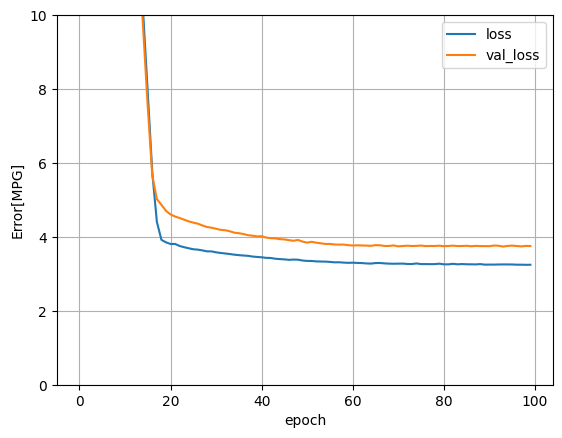

In [ ]:
plot_loss(history)

In [ ]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_dataset['Horsepower'], test_labels,
    verbose=0)

In [ ]:
x = tf.linspace(0.0,250, 251)
y = dnn_horsepower_model.predict(x)

8/8 [==============================] - 0s 4ms/step


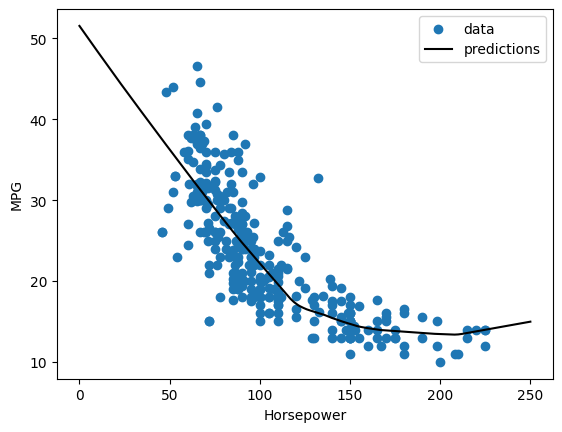

In [ ]:
plot_horsepower(x,y)

In [ ]:
dnn_model = build_and_compile(my_normalizer)

In [ ]:
dnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_normalizer (Normalizati  (None, 9)                 19        
 on)                                                             
                                                                 
 dense_10 (Dense)            (None, 64)                640       
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4884 (19.08 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________


In [ ]:
history = dnn_model.fit(
    train_features,
    train_labels,
    verbose = 0,
    epochs =100,
    validation_split = .2
)

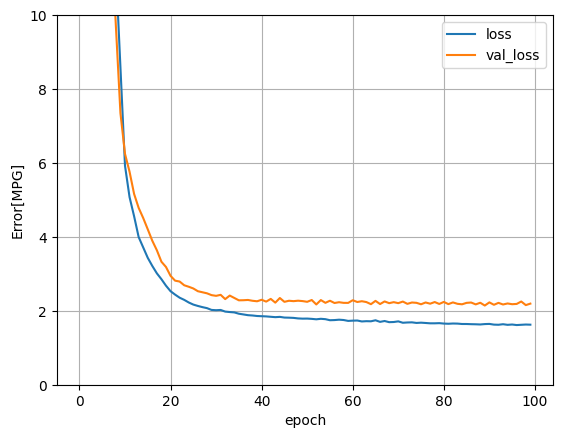

In [ ]:
plot_loss(history)

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose = 0)

In [ ]:
pd.DataFrame(test_results, index= ['Mean Absolute Error [MPG]']).T

,Mean Absolute Error [MPG]
horsepower_model,3.643225
linear_model,2.497677
dnn_horsepower_model,2.882087
dnn_model,1.666759


3/3 [==============================] - 0s 5ms/step


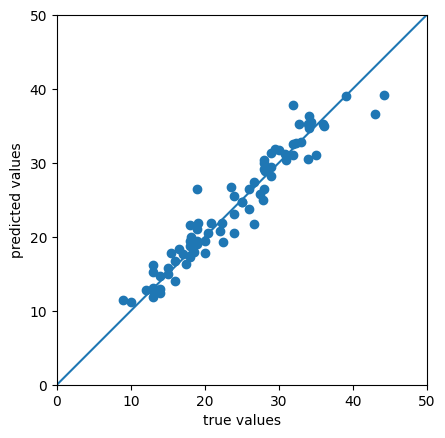

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a= plt.axes(aspect = 'equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)

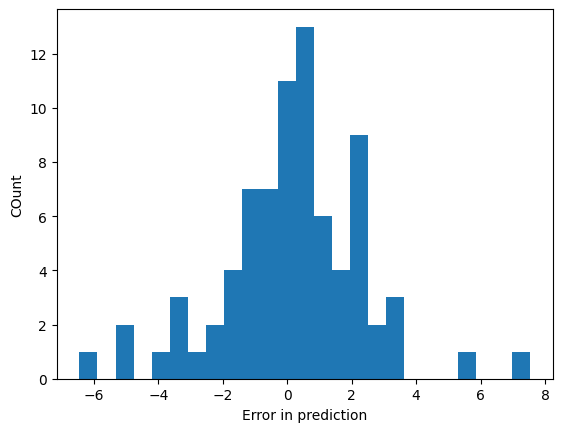

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Error in prediction")
_ = plt.ylabel('COunt')

In [ ]:
dnn_model.save('first_dnn_model')

In [ ]:
dnn_model.evaluate(test_features, test_labels, verbose = 0)

1.6667590141296387

In [ ]:
reloaded = tf.keras.models.load_model('first_dnn_model')

In [ ]:
test_results['reloaded']= reloaded.evaluate(test_features, test_labels, verbose = 0)

In [ ]:
pd.DataFrame(test_results, index= ["MAE"]).T

,MAE
horsepower_model,3.643225
linear_model,2.497677
dnn_horsepower_model,2.882087
dnn_model,1.666759
reloaded,1.666759
